In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from config import api_key
import matplotlib.patches as mpatches
import json
import traceback

In [3]:
base_url = 'https://developers.themoviedb.org/3/discover/movie-discover'
url="https://api.themoviedb.org/3/discover/movie?api_key="+api_key
pop="&primary_release_year=2019&include_adult=False&page="
GenreID="https://api.themoviedb.org/3/genre/movie/list?api_key="
Gen="&language=en-US"
querys = f"{GenreID}{api_key}{Gen}"

In [4]:
response = requests.get(querys).json()
genres=[]
genreword=[]
for k in range(0,19,1):
    try:
        genres.append(response['genres'][k]['id'])
        genreword.append(response['genres'][k]["name"])
    except:
        genres.append(np.nan)
        genreword.append(np.nan)
        
GenreFrame=pd.DataFrame({"Genres": genres,
                         "Genre Names": genreword
                        })  

GenreFrame

,Genres,Genre Names
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [5]:
# Looped through api response to build dataframe of all the genres and their IDs

In [6]:
Genres = []
Date=[]
MovieTitle=[]
Pop=[]
VoteAvg=[]

for i in range(1,501,1):
    query = f"{url}{pop}{i}"
    response = requests.get(query).json()
    
    for j in range(0,20,1):
        try:
            Pop.append(response['results'][j]["popularity"])
            MovieTitle.append(response['results'][j]["original_title"])
            VoteAvg.append(response['results'][j]["vote_average"])
            Genres.append(response['results'][j]["genre_ids"])
            Date.append(response['results'][j]["release_date"])
            
        except TypeError:
            Pop.append(np.nan)
            MovieTitle.append(np.nan)
            VoteAvg.append(np.nan)
            Genres.append(np.nan)
            Date.append(np.nan)

In [7]:
Movies=pd.DataFrame({'Movie Title':MovieTitle,
                    'Popular Score':Pop,
                    'Vote Average':VoteAvg,
                    'Genres':Genres,
                    'Release Date': Date})

In [8]:
Movies.head()

,Movie Title,Popular Score,Vote Average,Genres,Release Date
0,Ad Astra,439.949,5.9,"[12, 18, 9648, 878, 53]",2019-09-17
1,Star Wars: The Rise of Skywalker,330.468,6.5,"[28, 12, 878]",2019-12-18
2,Jumanji: The Next Level,221.327,6.8,"[28, 12, 35, 14]",2019-12-04
3,A Rainy Day in New York,175.534,6.7,"[35, 10749]",2019-07-26
4,Frozen II,168.037,7.1,"[12, 16, 10751]",2019-11-20


In [9]:
# Looped through api response to build movie dataframe.

In [10]:
Movies = Movies[Movies.astype(str)['Genres'] != '[]']
# A ton of our Genre values were listed as '[]', which wasn't registering as NaN, NA, null, or 0. Probably the main reason
# later edits became so difficult

In [11]:
Movies.reset_index(inplace=True)

In [12]:
Movies = Movies.drop(columns='index')

In [13]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date
0,Ad Astra,439.949,5.9,"[12, 18, 9648, 878, 53]",2019-09-17
1,Star Wars: The Rise of Skywalker,330.468,6.5,"[28, 12, 878]",2019-12-18
2,Jumanji: The Next Level,221.327,6.8,"[28, 12, 35, 14]",2019-12-04
3,A Rainy Day in New York,175.534,6.7,"[35, 10749]",2019-07-26
4,Frozen II,168.037,7.1,"[12, 16, 10751]",2019-11-20
...,...,...,...,...,...
8439,Right Livelihood: A Journey to Here,0.840,0.0,[99],2019-06-20
8440,Love Is War,0.840,0.0,[18],2019-09-27
8441,Stuff,0.840,0.0,"[80, 18]",2019-10-01
8442,Keyboard Fantasies: The Beverly Glenn-Copeland...,0.840,0.0,[99],2019-11-02


In [14]:
Parse=Movies["Genres"].apply(pd.Series)
Parse.columns=["Genre1","Genre2","Genre3","Genre4","Genre5","Genre6","Genre7"]
Parse.fillna(0)

,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
0,12.0,18.0,9648.0,878.0,53.0,0.0,0.0
1,28.0,12.0,878.0,0.0,0.0,0.0,0.0
2,28.0,12.0,35.0,14.0,0.0,0.0,0.0
3,35.0,10749.0,0.0,0.0,0.0,0.0,0.0
4,12.0,16.0,10751.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8439,99.0,0.0,0.0,0.0,0.0,0.0,0.0
8440,18.0,0.0,0.0,0.0,0.0,0.0,0.0
8441,80.0,18.0,0.0,0.0,0.0,0.0,0.0
8442,99.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Flattening the genre reponse and storing each element from the list individually

In [16]:
Movies = Movies.join(Parse, lsuffix='', rsuffix='')
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
0,Ad Astra,439.949,5.9,"[12, 18, 9648, 878, 53]",2019-09-17,12.0,18.0,9648.0,878.0,53.0,NaN,NaN
1,Star Wars: The Rise of Skywalker,330.468,6.5,"[28, 12, 878]",2019-12-18,28.0,12.0,878.0,NaN,NaN,NaN,NaN
2,Jumanji: The Next Level,221.327,6.8,"[28, 12, 35, 14]",2019-12-04,28.0,12.0,35.0,14.0,NaN,NaN,NaN
3,A Rainy Day in New York,175.534,6.7,"[35, 10749]",2019-07-26,35.0,10749.0,NaN,NaN,NaN,NaN,NaN
4,Frozen II,168.037,7.1,"[12, 16, 10751]",2019-11-20,12.0,16.0,10751.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8439,Right Livelihood: A Journey to Here,0.840,0.0,[99],2019-06-20,99.0,NaN,NaN,NaN,NaN,NaN,NaN
8440,Love Is War,0.840,0.0,[18],2019-09-27,18.0,NaN,NaN,NaN,NaN,NaN,NaN
8441,Stuff,0.840,0.0,"[80, 18]",2019-10-01,80.0,18.0,NaN,NaN,NaN,NaN,NaN
8442,Keyboard Fantasies: The Beverly Glenn-Copeland...,0.840,0.0,[99],2019-11-02,99.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Merging the flattened genre list and main dataframe

In [18]:
Movies['Month']=pd.DatetimeIndex(Movies["Release Date"]).month

Janscore = Movies.loc[Movies["Month"] == 1]
Febscore= Movies.loc[Movies["Month"] == 2]
Marscore= Movies.loc[Movies["Month"] == 3]
Aprscore= Movies.loc[Movies["Month"] == 4]
Mayscore= Movies.loc[Movies["Month"] == 5]
Junscore= Movies.loc[Movies["Month"] == 6]
Julscore= Movies.loc[Movies["Month"] == 7]
Augscore= Movies.loc[Movies["Month"] == 8]
Septscore= Movies.loc[Movies["Month"] == 9]
Octscore= Movies.loc[Movies["Month"] == 10]
Novscore= Movies.loc[Movies["Month"] == 11]
Decscore= Movies.loc[Movies["Month"] == 12]

Jan=Janscore.loc[Janscore['Popular Score'].idxmax()]
Ja=Jan['Genres'][0]
Feb=Febscore.loc[Febscore['Popular Score'].idxmax()]
Fe=Feb['Genres'][0]
Mar=Marscore.loc[Marscore['Popular Score'].idxmax()]
Ma=Mar['Genres'][0]
Apr=Aprscore.loc[Aprscore['Popular Score'].idxmax()]
Ap=Apr['Genres'][0]
May=Mayscore.loc[Mayscore['Popular Score'].idxmax()]
Mayo=May['Genres'][0]
June=Junscore.loc[Junscore['Popular Score'].idxmax()]
Junio=June['Genres'][0]
July=Julscore.loc[Julscore['Popular Score'].idxmax()]
Julio=July['Genres'][0]
Aug=Augscore.loc[Augscore['Popular Score'].idxmax()]
Au=Aug['Genres'][0]
Sept=Septscore.loc[Septscore['Popular Score'].idxmax()]
Se=Sept['Genres'][0]
Oct=Octscore.loc[Octscore['Popular Score'].idxmax()]
Oc=Oct['Genres'][0]
Nov=Novscore.loc[Novscore['Popular Score'].idxmax()]
No=Nov['Genres'][0]
Dec=Decscore.loc[Decscore['Popular Score'].idxmax()]
De=Dec['Genres'][0]
De

Septscore
SeptParse=Septscore["Genres"].apply(pd.Series)
SeptParse
SeptParse.columns=["Genre1","Genre2","Genre3","Genre4","Genre5","Genre6"]

SeptFinal=Septscore.merge(SeptParse, how='outer')
SeptMed=[]
SeptMean=[]
for gen in GenreFrame["Genres"]:
    SeptFinals=SeptFinal.loc[SeptFinal["Genre1"]==gen]
    SeptMean.append(SeptFinals["Popular Score"].mean())
    SeptMed.append(SeptFinals["Popular Score"].median())
    

#for gen in GenreIndex:
Stats=pd.DataFrame(SeptMed)

Septmm=pd.DataFrame(SeptMean)
Septmm.columns=["September Mean"]
Stats.columns=["September Median"]
Stats
GenreFrame

combin=Septmm.join(Stats)    #print(avgSept)
FinalSeptemberStats=GenreFrame.join(combin)
FinalSeptemberStats

,Genres,Genre Names,September Mean,September Median
0,28,Action,4.596610,1.9600
1,12,Adventure,30.677444,1.5445
2,16,Animation,2.350075,1.2070
3,35,Comedy,2.825977,1.5860
4,80,Crime,3.674547,1.7360
5,99,Documentary,1.871228,1.4000
6,18,Drama,2.448213,1.3600
7,10751,Family,2.739250,2.8075
8,14,Fantasy,3.080833,1.5735
9,36,History,2.110167,2.0970


In [19]:
# Set variables to define each month and pulled the highest value for Popular score for each. 

In [20]:
Months=Movies.groupby(Movies["Month"])
MaxMonthScore=Months["Popular Score"].max()
MaxMonthScore
TopGenreframe=pd.DataFrame({"Month":["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"],
                            "Genres":[Ja,Fe,Ma,Ap,Mayo,Junio,Julio,Au,Se,Oc,No,De],
                            "MonthID":[1,2,3,4,5,6,7,8,9,10,11,12]
                             
                            
    
                            })
MaxM=pd.DataFrame({"Month":["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"],
                            "Top Score":[MaxMonthScore[1],MaxMonthScore[2],MaxMonthScore[3],MaxMonthScore[4],MaxMonthScore[5]
                                     ,MaxMonthScore[6],MaxMonthScore[7],MaxMonthScore[8],MaxMonthScore[9],MaxMonthScore[10],
                                     MaxMonthScore[11],MaxMonthScore[12]]  
                             
                            
    
                            })

Basis=pd.merge(TopGenreframe,MaxM,how="inner",on="Month")
Basis

,Month,Genres,MonthID,Top Score
0,Jan,12,1,37.838
1,Feb,18,2,28.651
2,Mar,28,3,42.489
3,Apr,28,4,37.625
4,May,35,5,131.018
5,June,28,6,56.340
6,July,35,7,175.534
7,Aug,18,8,103.697
8,Sep,12,9,439.949
9,Oct,80,10,156.777


In [21]:
New=pd.merge(GenreFrame,Basis,how="inner",on="Genres")

New.sort_values(by='MonthID', inplace=True)
New

,Genres,Genre Names,Month,MonthID,Top Score
4,12,Adventure,Jan,1,37.838
10,18,Drama,Feb,2,28.651
0,28,Action,Mar,3,42.489
1,28,Action,Apr,4,37.625
7,35,Comedy,May,5,131.018
2,28,Action,June,6,56.340
8,35,Comedy,July,7,175.534
11,18,Drama,Aug,8,103.697
5,12,Adventure,Sep,9,439.949
9,80,Crime,Oct,10,156.777


In [22]:
BestMonth = pd.DataFrame(columns=['Month', 'Genre', 'Top Score', 'Month ID'])
BestMonth

,Month,Genre,Top Score,Month ID


In [23]:
BestMonth['Month'] = New['Month']
BestMonth['Month ID'] = New['MonthID']
BestMonth['Genre'] = New['Genre Names']
BestMonth['Top Score'] = New['Top Score']

BestMonth.set_index('Month ID', inplace=True)

BestMonth

,Month,Genre,Top Score
Month ID,,,
1,Jan,Adventure,37.838
2,Feb,Drama,28.651
3,Mar,Action,42.489
4,Apr,Action,37.625
5,May,Comedy,131.018
6,June,Action,56.340
7,July,Comedy,175.534
8,Aug,Drama,103.697
9,Sep,Adventure,439.949


In [24]:
# Combined above data frames and data for final BestMonth frame

In [25]:
Movies = Movies.dropna(subset=['Month'])

In [26]:
Movies['Genre1'].fillna(0, inplace=True)
Movies['Genre2'].fillna(0, inplace=True)
Movies['Genre3'].fillna(0, inplace=True)
Movies['Genre4'].fillna(0, inplace=True)
Movies['Genre5'].fillna(0, inplace=True)
Movies['Genre6'].fillna(0, inplace=True)
Movies['Genre7'].fillna(0, inplace=True)

C:\Users\Cade\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
Movies['Month'].astype('int64').dtypes
Movies['Genre1'].astype('int64').dtypes
Movies['Genre2'].astype('int64').dtypes
Movies['Genre3'].astype('int64').dtypes
Movies['Genre4'].astype('int64').dtypes
Movies['Genre5'].astype('int64').dtypes
Movies['Genre6'].astype('int64').dtypes
Movies['Genre7'].astype('int64').dtypes

dtype('int64')

In [28]:
Movies.reset_index(inplace=True)

In [29]:
Movies.drop(columns=('index'), inplace=True)

C:\Users\Cade\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Month
0,Ad Astra,439.949,5.9,"[12, 18, 9648, 878, 53]",2019-09-17,12.0,18.0,9648.0,878.0,53.0,0.0,0.0,9.0
1,Star Wars: The Rise of Skywalker,330.468,6.5,"[28, 12, 878]",2019-12-18,28.0,12.0,878.0,0.0,0.0,0.0,0.0,12.0
2,Jumanji: The Next Level,221.327,6.8,"[28, 12, 35, 14]",2019-12-04,28.0,12.0,35.0,14.0,0.0,0.0,0.0,12.0
3,A Rainy Day in New York,175.534,6.7,"[35, 10749]",2019-07-26,35.0,10749.0,0.0,0.0,0.0,0.0,0.0,7.0
4,Frozen II,168.037,7.1,"[12, 16, 10751]",2019-11-20,12.0,16.0,10751.0,0.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438,Right Livelihood: A Journey to Here,0.840,0.0,[99],2019-06-20,99.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
8439,Love Is War,0.840,0.0,[18],2019-09-27,18.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
8440,Stuff,0.840,0.0,"[80, 18]",2019-10-01,80.0,18.0,0.0,0.0,0.0,0.0,0.0,10.0
8441,Keyboard Fantasies: The Beverly Glenn-Copeland...,0.840,0.0,[99],2019-11-02,99.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0


In [31]:
# Replaced NA values in the Genre columns to allow iteration without errors

In [32]:
count1 = Movies["Genre1"].value_counts()
count2 = Movies["Genre2"].value_counts()
count3 = Movies["Genre3"].value_counts()
count4 = Movies["Genre4"].value_counts()
count5 = Movies["Genre5"].value_counts()
count6 = Movies["Genre6"].value_counts()
count7 = Movies["Genre7"].value_counts()

count1df = pd.DataFrame(data=count1)
count2df = pd.DataFrame(data=count2)
count3df = pd.DataFrame(data=count3)
count4df = pd.DataFrame(data=count4)
count5df = pd.DataFrame(data=count5)
count6df = pd.DataFrame(data=count6)
count7df = pd.DataFrame(data=count7)

count1df.reset_index(inplace=True)
count2df.reset_index(inplace=True)
count3df.reset_index(inplace=True)
count4df.reset_index(inplace=True)
count5df.reset_index(inplace=True)
count6df.reset_index(inplace=True)
count7df.reset_index(inplace=True)

In [33]:
merge1=pd.merge(count1df, count2df, how='left', on='index')
merge2=pd.merge(merge1, count3df, how='left', on='index')
merge3=pd.merge(merge2, count4df, how='left', on='index')
merge4=pd.merge(merge3, count5df, how='left', on='index')
merge5=pd.merge(merge4, count6df, how='left', on='index')
finalmerge=pd.merge(merge5, count7df, how='left', on='index')
finalmerge.set_index('index', inplace=True)

In [34]:
# Counted genre values for each column and totaled the amount of genre appearances

In [35]:
finalmerge['sum'] = finalmerge.sum(axis=1)
finalmerge['sum']

index
18.0       3118.0
99.0       1866.0
35.0       1820.0
27.0        916.0
28.0        656.0
16.0        419.0
80.0        478.0
53.0        984.0
10749.0     801.0
12.0        271.0
10402.0     320.0
878.0       321.0
9648.0      309.0
14.0        276.0
10751.0     371.0
10770.0     413.0
36.0        231.0
37.0         35.0
10752.0     105.0
Name: sum, dtype: float64

In [36]:
finalmerge

,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,sum
index,,,,,,,,
18.0,2174,812,115,16,1.0,NaN,NaN,3118.0
99.0,1809,55,1,1,NaN,NaN,NaN,1866.0
35.0,1453,280,77,8,2.0,NaN,NaN,1820.0
27.0,643,213,50,6,4.0,NaN,NaN,916.0
28.0,576,53,24,3,NaN,NaN,NaN,656.0
16.0,290,105,22,1,NaN,1.0,NaN,419.0
80.0,272,162,39,4,1.0,NaN,NaN,478.0
53.0,272,400,241,60,7.0,4.0,NaN,984.0
10749.0,269,378,124,22,7.0,1.0,NaN,801.0


In [37]:
ReleaseGenreFrame = GenreFrame.sort_values(by='Genres')
ReleaseGenreFrame = ReleaseGenreFrame.rename(columns={'Genres':'index'})
ReleaseGenreFrame

,index,Genre Names
1,12,Adventure
8,14,Fantasy
2,16,Animation
6,18,Drama
10,27,Horror
0,28,Action
3,35,Comedy
9,36,History
18,37,Western
16,53,Thriller


In [38]:
Releases = pd.DataFrame(data=finalmerge['sum'])
Releases.reset_index(inplace=True)
Releases = Releases.astype({'index': 'int64','sum': 'int64'})

In [39]:
TotalFrame = Releases.sort_values(by='index')
TotalFrame

,index,sum
9,12,271
13,14,276
5,16,419
0,18,3118
3,27,916
4,28,656
2,35,1820
16,36,231
17,37,35
7,53,984


In [40]:
TotalReleases = pd.merge(ReleaseGenreFrame,TotalFrame,how='inner', on='index')

In [41]:
TotalReleases = TotalReleases.sort_values(by='sum', ascending=False)
TotalReleases = TotalReleases.rename(columns={'index':'Genre ID', 'Genre Names': 'Genre', 'sum':'Total Count'})
TotalReleases.set_index('Genre ID', inplace=True)

In [42]:
TotalReleases

,Genre,Total Count
Genre ID,,
18,Drama,3118
99,Documentary,1866
35,Comedy,1820
53,Thriller,984
27,Horror,916
10749,Romance,801
28,Action,656
80,Crime,478
16,Animation,419


In [43]:
# Combined genre names and IDs with the totals found earlier in finalsum

In [44]:
topmovies = Movies[:100]
topgenres = topmovies['Genres']
topcount = topgenres.value_counts()
topcount

[28, 12, 878]            7
[18]                     5
[35]                     4
[28, 53]                 4
[35, 10749]              4
                        ..
[35, 9648]               1
[12, 10751]              1
[28, 80, 18, 878, 53]    1
[28, 18, 36, 10752]      1
[18, 14, 27, 9648]       1
Name: Genres, Length: 67, dtype: int64

In [45]:
topcombos = topcount.nlargest(10)
topcombos = pd.DataFrame(data=topcombos)
topcombos.reset_index(inplace=True)

In [46]:
topcombos = topcombos.rename(columns={'index': 'Genre IDs','Genres':'Count'})
topcombos

,Genre IDs,Count
0,"[28, 12, 878]",7
1,[18],5
2,[35],4
3,"[28, 53]",4
4,"[35, 10749]",4
5,"[18, 10749]",3
6,"[12, 16, 35, 10751]",2
7,"[35, 80, 18, 53]",2
8,"[80, 18, 53]",2
9,"[18, 53]",2


In [47]:
# Pulled and counted top combinations from the top 100 movies in dataset

In [48]:
topcombos = topcombos[topcombos['Genre IDs'].map(lambda d: len(d)) > 1]
topcombos.reset_index(inplace=True)
topcombos.drop(columns='index', inplace=True)
topslice = topcombos[0:3]
topcombos

,Genre IDs,Count
0,"[28, 12, 878]",7
1,"[28, 53]",4
2,"[35, 10749]",4
3,"[18, 10749]",3
4,"[12, 16, 35, 10751]",2
5,"[35, 80, 18, 53]",2
6,"[80, 18, 53]",2
7,"[18, 53]",2


In [49]:
Top3Combo = pd.DataFrame(columns=['Genre IDs', 'Genres', 'Top 100 Count'])

In [50]:
Top3Combo['Genre IDs'] = topslice['Genre IDs']
Top3Combo['Top 100 Count'] = topslice['Count']
Top3Combo

,Genre IDs,Genres,Top 100 Count
0,"[28, 12, 878]",NaN,7
1,"[28, 53]",NaN,4
2,"[35, 10749]",NaN,4


In [51]:
# Added column for Genre names and pulled top 3 combos from earlier topcombos

In [52]:
print(GenreFrame.loc[GenreFrame['Genres'] == 28])
print(GenreFrame.loc[GenreFrame['Genres'] == 12])
print(GenreFrame.loc[GenreFrame['Genres'] == 878])
print(GenreFrame.loc[GenreFrame['Genres'] == 53])
print(GenreFrame.loc[GenreFrame['Genres'] == 35])
print(GenreFrame.loc[GenreFrame['Genres'] == 10749])

   Genres Genre Names
0      28      Action
   Genres Genre Names
1      12   Adventure
    Genres      Genre Names
14     878  Science Fiction
    Genres Genre Names
16      53    Thriller
   Genres Genre Names
3      35      Comedy
    Genres Genre Names
13   10749     Romance


In [53]:
Top3Combo['Genres'] = ['Action, Adventure, Science Fiction','Comedy, Romance','Horror, Thriller']
Top3Combo

,Genre IDs,Genres,Top 100 Count
0,"[28, 12, 878]","Action, Adventure, Science Fiction",7
1,"[28, 53]","Comedy, Romance",4
2,"[35, 10749]","Horror, Thriller",4


In [54]:
# Used a loc to find the listed IDs and hardcoded the Genre names into the table
# Make sure to update the names for accurate representation

In [55]:
Months_list = ['1','2','3','4','5','6','7','8','9','10','11','12']
Yearcount = pd.DataFrame(columns={'Month': '',
                                  'Action': '',
                                  'Adventure': '',
                                  'Animation': '',
                                  'Comedy': '',
                                  'Crime': '',
                                  'Documentary': '',
                                  'Drama': '',
                                  'Family': '',
                                  'Fantasy': '',
                                  'History': '',
                                  'Horror': '',
                                  'Music': '',
                                  'Mystery': '',
                                  'Romance': '',
                                  'Science Fiction':'',
                                  'TV Movie': '',
                                  'Thriller': '', 
                                  'War': '',
                                  'Western': ''})
Yearcount['Month'] = Months_list
Yearcount['Month']=Yearcount['Month'].astype('int64')

In [56]:
Yearcount=Yearcount.fillna(0)

In [57]:
Yearcount.set_index('Month', inplace=True)

In [58]:
Movies = Movies.dropna(subset=['Month'])

In [59]:
Movies['Genre1'] = Movies['Genre1'].fillna(0)
Movies['Genre2'] = Movies['Genre2'].fillna(0)
Movies['Genre3'] = Movies['Genre3'].fillna(0)
Movies['Genre4'] = Movies['Genre4'].fillna(0)
Movies['Genre5'] = Movies['Genre5'].fillna(0)
Movies['Genre6'] = Movies['Genre6'].fillna(0)
Movies['Genre7'] = Movies['Genre7'].fillna(0)

Movies['Month'] = Movies['Month'].astype('int64')
Movies['Genre1'] = Movies['Genre1'].astype('int64')
Movies['Genre2'] = Movies['Genre2'].astype('int64')
Movies['Genre3'] = Movies['Genre3'].astype('int64')
Movies['Genre4'] = Movies['Genre4'].astype('int64')
Movies['Genre5'] = Movies['Genre5'].astype('int64')
Movies['Genre6'] = Movies['Genre6'].astype('int64')
Movies['Genre7'] = Movies['Genre7'].astype('int64')

In [60]:
Movies.reset_index(inplace=True)

In [61]:
Movies.drop(columns=('index'), inplace=True)

In [62]:
# Create new Yearcount df, fillna in both Yearcount and Movies again to make sure iteration works correctly

In [63]:
for i in range(0, 8296, 1):
    
    for k in range(1, 13, 1):
            
            if Movies['Month'][i] == k:

                if Movies['Genre1'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre1'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre1'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre1'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre1'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre1'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre1'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre1'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre1'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre1'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre1'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre1'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre1'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre1'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre1'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre1'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre1'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre1'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre1'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next
            
            if Movies['Month'][i] == k:
                
                if Movies['Genre2'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre2'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre2'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre2'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre2'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre2'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre2'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre2'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre2'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre2'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre2'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre2'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre2'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre2'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre2'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre2'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre2'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre2'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre2'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next

            if Movies['Month'][i] == k:    
                
                
                if Movies['Genre3'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre3'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre3'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre3'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre3'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre3'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre3'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre3'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre3'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre3'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre3'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre3'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre3'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre3'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre3'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre3'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre3'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre3'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre3'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next
                    
            if Movies['Month'][i] == k:
                    
                
                if Movies['Genre4'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre4'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre4'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre4'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre4'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre4'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre4'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre4'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre4'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre4'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre4'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre4'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre4'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre4'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre4'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre4'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre4'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre4'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre4'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next

            if Movies['Month'][i] == k:
            
                
                if Movies['Genre5'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre5'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre5'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre5'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre5'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre5'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre5'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre5'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre5'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre5'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre5'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre5'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre5'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre5'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre5'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre5'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre5'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre5'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre5'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next

            if Movies['Month'][i] == k:
                    
                
                if Movies['Genre6'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre6'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre6'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre6'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre6'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre6'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre6'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre6'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre6'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre6'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre6'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre6'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre6'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre6'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre6'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre6'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre6'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre6'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre6'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next

            if Movies['Month'][i] == k:
            
                
                if Movies['Genre7'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre7'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre7'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre7'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre7'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre7'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre7'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre7'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre7'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre7'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre7'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre7'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre7'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre7'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre7'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre7'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre7'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre7'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre7'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next

In [64]:
# Loop that counts and populates Yearcount for genres by month

In [65]:
# Final 4 conclusive dataframes (based on the first 3 questions)
# --------------------------------------------------------------
BestMonth.head()

,Month,Genre,Top Score
Month ID,,,
1,Jan,Adventure,37.838
2,Feb,Drama,28.651
3,Mar,Action,42.489
4,Apr,Action,37.625
5,May,Comedy,131.018


In [66]:
TotalReleases

,Genre,Total Count
Genre ID,,
18,Drama,3118
99,Documentary,1866
35,Comedy,1820
53,Thriller,984
27,Horror,916
10749,Romance,801
28,Action,656
80,Crime,478
16,Animation,419


In [67]:
Top3Combo.head()

,Genre IDs,Genres,Top 100 Count
0,"[28, 12, 878]","Action, Adventure, Science Fiction",7
1,"[28, 53]","Comedy, Romance",4
2,"[35, 10749]","Horror, Thriller",4


In [68]:
Yearcount.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Month,,,,,,,,,,,,,,,,,,,
1,47,29,43,154,34,158,238,32,26,30,73,21,32,54,31,33,76,11,1
2,57,21,35,160,36,122,231,26,26,16,47,21,28,75,27,25,74,7,1
3,55,25,35,188,40,186,312,31,19,22,77,25,22,63,33,22,86,8,5
4,46,17,33,124,41,193,217,37,23,14,66,29,27,52,21,24,82,7,2
5,55,20,27,138,44,158,234,16,22,13,55,24,22,64,25,43,75,6,3


In [69]:
topcombos
# update combination names

,Genre IDs,Count
0,"[28, 12, 878]",7
1,"[28, 53]",4
2,"[35, 10749]",4
3,"[18, 10749]",3
4,"[12, 16, 35, 10751]",2
5,"[35, 80, 18, 53]",2
6,"[80, 18, 53]",2
7,"[18, 53]",2


In [70]:
GenreFrame

,Genres,Genre Names
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [71]:
# Graph work begins here

In [72]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Month
0,Ad Astra,439.949,5.9,"[12, 18, 9648, 878, 53]",2019-09-17,12,18,9648,878,53,0,0,9
1,Star Wars: The Rise of Skywalker,330.468,6.5,"[28, 12, 878]",2019-12-18,28,12,878,0,0,0,0,12
2,Jumanji: The Next Level,221.327,6.8,"[28, 12, 35, 14]",2019-12-04,28,12,35,14,0,0,0,12
3,A Rainy Day in New York,175.534,6.7,"[35, 10749]",2019-07-26,35,10749,0,0,0,0,0,7
4,Frozen II,168.037,7.1,"[12, 16, 10751]",2019-11-20,12,16,10751,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438,Right Livelihood: A Journey to Here,0.840,0.0,[99],2019-06-20,99,0,0,0,0,0,0,6
8439,Love Is War,0.840,0.0,[18],2019-09-27,18,0,0,0,0,0,0,9
8440,Stuff,0.840,0.0,"[80, 18]",2019-10-01,80,18,0,0,0,0,0,10
8441,Keyboard Fantasies: The Beverly Glenn-Copeland...,0.840,0.0,[99],2019-11-02,99,0,0,0,0,0,0,11


In [73]:
janavgps = Janscore['Popular Score'].mean()
janavgva = Janscore['Vote Average'].mean()
febavgps = Febscore['Popular Score'].mean()
febavgva = Febscore['Vote Average'].mean()
maravgps = Marscore['Popular Score'].mean()
maravgva = Marscore['Vote Average'].mean()
apravgps = Aprscore['Popular Score'].mean()
apravgva = Aprscore['Vote Average'].mean()
mayavgps = Mayscore['Popular Score'].mean()
mayavgva = Mayscore['Vote Average'].mean()
junavgps = Janscore['Popular Score'].mean()
junavgva = Junscore['Vote Average'].mean()
julavgps = Julscore['Popular Score'].mean()
julavgva = Julscore['Vote Average'].mean()
augavgps = Augscore['Popular Score'].mean()
augavgva = Augscore['Vote Average'].mean()
septavgps = Septscore['Popular Score'].mean()
septavgva = Septscore['Vote Average'].mean()
octavgps = Octscore['Popular Score'].mean()
octavgva = Octscore['Vote Average'].mean()
novavgps = Novscore['Popular Score'].mean()
novavgva = Novscore['Vote Average'].mean()
decavgps = Decscore['Popular Score'].mean()
decavgva = Decscore['Vote Average'].mean()

year_avg = pd.DataFrame(columns={'Popular Score Avg', 'Vote Average'})

In [74]:
print(Janscore['Popular Score'].median())

1.442


In [75]:
year_avg['Popular Score Avg']=(janavgps, febavgps, maravgps, apravgps, mayavgps, junavgps, julavgps, augavgps, septavgps, octavgps, novavgps, decavgps)
year_avg['Vote Average']=(janavgva,febavgva,maravgva,apravgva,mayavgva,junavgva,julavgva,augavgva,septavgva,octavgva,novavgva,decavgva)

In [76]:
year_avg.reset_index(inplace=True)
year_avg.rename(columns={'index':'Month'})

,Month,Popular Score Avg,Vote Average
0,0,2.973747,3.768706
1,1,2.959493,3.855662
2,2,2.989154,3.754198
3,3,2.839443,3.431737
4,4,3.667031,3.732609
5,5,2.973747,3.810518
6,6,3.532988,3.874074
7,7,3.483753,3.931075
8,8,3.902236,3.632095
9,9,3.087065,3.257704


In [77]:
year_avg['Month']=('January','February','March','April','May','June','July','August','September','October','November','December')
year_avg.drop(columns={'index'}, inplace=True)

In [78]:
year_avg

,Popular Score Avg,Vote Average,Month
0,2.973747,3.768706,January
1,2.959493,3.855662,February
2,2.989154,3.754198,March
3,2.839443,3.431737,April
4,3.667031,3.732609,May
5,2.973747,3.810518,June
6,3.532988,3.874074,July
7,3.483753,3.931075,August
8,3.902236,3.632095,September
9,3.087065,3.257704,October


In [79]:
# Created new dataframe for values used in graph below. Just found averages for Popular Score and Vote Average by month

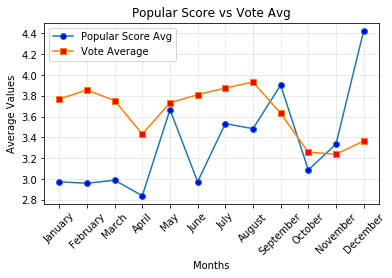

In [80]:
plt.plot('Month', 'Popular Score Avg', data=year_avg, marker='o',markerfacecolor='blue')
plt.plot('Month', 'Vote Average', data=year_avg, marker='s',markerfacecolor='red')
plt.xticks(rotation=45)
plt.legend()
plt.gcf().subplots_adjust(bottom=0.25)
plt.xlabel('Months')
plt.ylabel('Average Values')
plt.grid(True, alpha=.3)
plt.title('Popular Score vs Vote Avg')
plt.savefig('Pop Score vs Vote.png')

In [81]:
set1 = []
set2 = []
set3 = []
set4 = []
set5 = []
set6 = []
set7 = []
set8 = []

for i in range(0, 100, 1):

        if topmovies['Genres'][i] == topcombos['Genre IDs'][0]:
            
            try:
                set1.append(topmovies.iloc[[i]])
                
            except:
                next
        
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][1]:
            
            try:
                set2.append(topmovies.iloc[[i]])
                
            except:
                next
        
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][2]:
            
            try:
                set3.append(topmovies.iloc[[i]])
                
            except:
                next
                
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][3]:
            
            try:
                set4.append(topmovies.iloc[[i]])
                
            except:
                next
                
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][4]:
            
            try:
                set5.append(topmovies.iloc[[i]])
                
            except:
                next
                
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][5]:
            
            try:
                set6.append(topmovies.iloc[[i]])
                
            except:
                next
                
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][6]:
            
            try:
                set7.append(topmovies.iloc[[i]])
                
            except:
                next
        
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][6]:
            
            try:
                set7.append(topmovies.iloc[[i]])
                
            except:
                next

In [82]:
# Loop through movies to match top combos and place them into empty lists

In [83]:
set1_df = pd.concat(set1)
set2_df = pd.concat(set2)
set3_df = pd.concat(set3)
set4_df = pd.concat(set4)
set5_df = pd.concat(set5)
set6_df = pd.concat(set6)
set7_df = pd.concat(set7)

In [84]:
comboavg = []

comboavg.append(set1_df['Popular Score'].mean())
comboavg.append(set2_df['Popular Score'].mean())
comboavg.append(set3_df['Popular Score'].mean())
comboavg.append(set4_df['Popular Score'].mean())
comboavg.append(set5_df['Popular Score'].mean())
comboavg.append(set6_df['Popular Score'].mean())
comboavg.append(set7_df['Popular Score'].mean())

In [85]:
combomed = []

combomed.append(set1_df['Popular Score'].median())
combomed.append(set2_df['Popular Score'].median())
combomed.append(set3_df['Popular Score'].median())
combomed.append(set4_df['Popular Score'].median())
combomed.append(set5_df['Popular Score'].median())
combomed.append(set6_df['Popular Score'].median())
combomed.append(set7_df['Popular Score'].median())

In [86]:
# Create new list for average score by combo, populate with earlier created sets and run mean on values.

In [87]:
topcombos = topcombos[0:7]

In [88]:
topcombos

,Genre IDs,Count
0,"[28, 12, 878]",7
1,"[28, 53]",4
2,"[35, 10749]",4
3,"[18, 10749]",3
4,"[12, 16, 35, 10751]",2
5,"[35, 80, 18, 53]",2
6,"[80, 18, 53]",2


In [89]:
comboavg_df = pd.DataFrame(data=topcombos)
comboavg_df['Avg Popular Score'] = comboavg
comboavg_df['Genre Combinations'] = ['Action, Adventure, Science Fiction',
                         'Horror, Thriller',
                         'Comedy, Romance',
                         'Action, Thriller',
                         'Drama, Romance',
                         'Drama, Thriller',
                         'Action, Crime, Thriller']
# comboavg_df.drop(columns=['Count'], inplace=True)
# when rerunning this cell to update names, the above line will error out after initial notebook run. just comment it out while
# renaming combinations
comboavg_df

,Genre IDs,Count,Avg Popular Score,Genre Combinations
0,"[28, 12, 878]",7,83.629286,"Action, Adventure, Science Fiction"
1,"[28, 53]",4,36.653750,"Horror, Thriller"
2,"[35, 10749]",4,67.966000,"Comedy, Romance"
3,"[18, 10749]",3,39.577000,"Action, Thriller"
4,"[12, 16, 35, 10751]",2,29.399000,"Drama, Romance"
5,"[35, 80, 18, 53]",2,50.173500,"Drama, Thriller"
6,"[80, 18, 53]",2,95.897000,"Action, Crime, Thriller"


In [90]:
# comboavg_df=comboavg_df.drop(index=[7], inplace=True)
topcombos

,Genre IDs,Count,Avg Popular Score,Genre Combinations
0,"[28, 12, 878]",7,83.629286,"Action, Adventure, Science Fiction"
1,"[28, 53]",4,36.653750,"Horror, Thriller"
2,"[35, 10749]",4,67.966000,"Comedy, Romance"
3,"[18, 10749]",3,39.577000,"Action, Thriller"
4,"[12, 16, 35, 10751]",2,29.399000,"Drama, Romance"
5,"[35, 80, 18, 53]",2,50.173500,"Drama, Thriller"
6,"[80, 18, 53]",2,95.897000,"Action, Crime, Thriller"


In [91]:
GenreFrame

,Genres,Genre Names
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [92]:
combomed_df = pd.DataFrame(data=topcombos)
combomed_df['Median Popular Score'] = combomed
combomed_df['Genre Combinations'] = ['Action, Adventure, Science Fiction',
                         'Horror, Thriller',
                         'Comedy, Romance',
                         'Action, Thriller',
                         'Drama, Romance',
                         'Drama, Thriller',
                         'Action, Crime, Thriller']
# comboavg_df.drop(columns=['Count'], inplace=True)
# when rerunning this cell to update names, the above line will error out after initial notebook run. just comment it out while
# renaming combinations
combomed_df

,Genre IDs,Count,Avg Popular Score,Genre Combinations,Median Popular Score
0,"[28, 12, 878]",7,83.629286,"Action, Adventure, Science Fiction",42.4890
1,"[28, 53]",4,36.653750,"Horror, Thriller",37.3745
2,"[35, 10749]",4,67.966000,"Comedy, Romance",34.4265
3,"[18, 10749]",3,39.577000,"Action, Thriller",31.7340
4,"[12, 16, 35, 10751]",2,29.399000,"Drama, Romance",29.3990
5,"[35, 80, 18, 53]",2,50.173500,"Drama, Thriller",50.1735
6,"[80, 18, 53]",2,95.897000,"Action, Crime, Thriller",95.8970


In [93]:
# Created dataframe with current avg popular score by genre ID list/combo
# Make sure to update hardcoded genre names in this table

In [94]:
# GenreFrame
# Pulling genreframe here to match and update combination names in comboavg_df

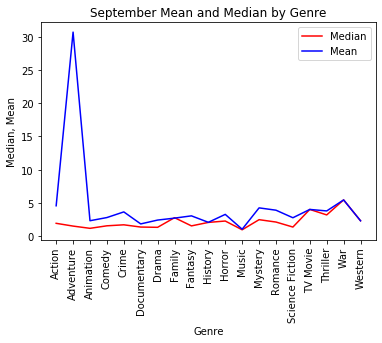

In [96]:
FinalSeptemberStats
we,=plt.plot(FinalSeptemberStats["Genre Names"],FinalSeptemberStats["September Median"], "r",label="Median")
wew,=plt.plot(FinalSeptemberStats["Genre Names"],FinalSeptemberStats["September Mean"],"b",label="Mean")
plt.xlabel("Genre")
plt.ylabel('Median, Mean')
plt.xticks(FinalSeptemberStats["Genre Names"],rotation="vertical")
plt.legend(handles=[we, wew])
plt.title('September Mean and Median by Genre')
plt.savefig("Resources/September Median and Mode.png")

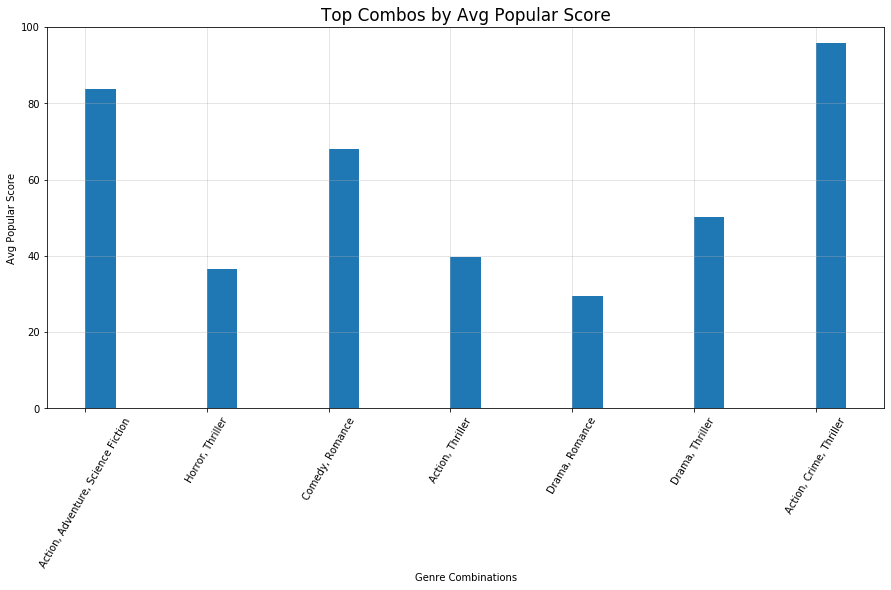

In [97]:
plt.figure(figsize=(15,10))
plt.bar('Genre Combinations', 'Avg Popular Score', data=comboavg_df, width=.25, align='edge')
plt.xticks(rotation=60)
plt.xlabel('Genre Combinations')
plt.ylabel('Avg Popular Score')
plt.ylim(bottom=0, top=100)
plt.grid(True, alpha=.40)
plt.gcf().subplots_adjust(bottom=0.35)
plt.rc('font', size=14)
plt.title('Top Combos by Avg Popular Score')
plt.savefig('Resources/Top Combos by Avg Popular Score.png')

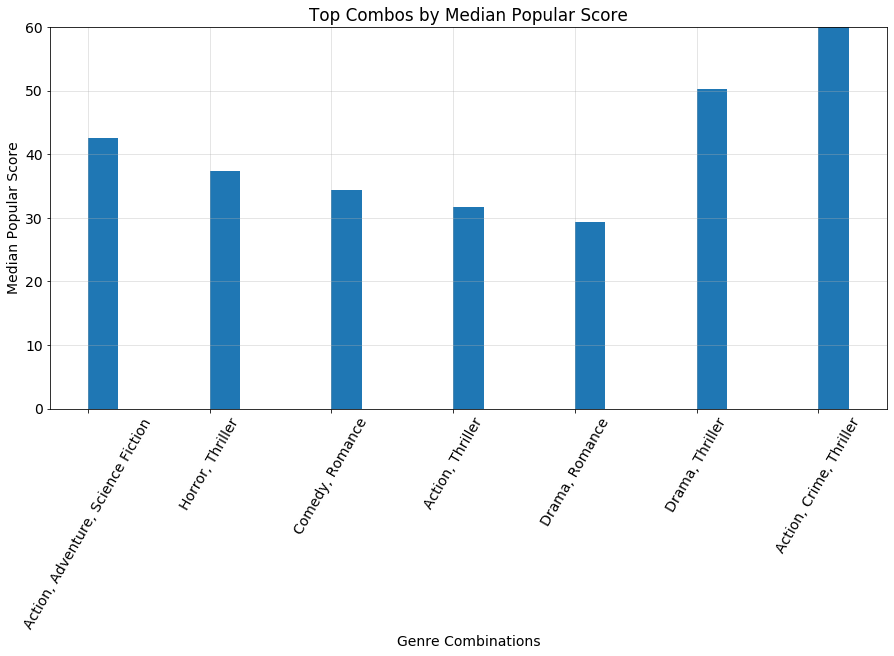

In [98]:
plt.figure(figsize=(15,10))
plt.bar('Genre Combinations', 'Median Popular Score', data=combomed_df, width=.25, align='edge')
plt.xticks(rotation=60)
plt.xlabel('Genre Combinations')
plt.ylabel('Median Popular Score')
plt.ylim(bottom=0, top=60)
plt.grid(True, alpha=.40)
plt.gcf().subplots_adjust(bottom=0.35)
plt.rc('font', size=14)
plt.title('Top Combos by Median Popular Score')
plt.savefig('Resources/Top Combos by Median Popular Score.png')

In [99]:
def linregFunc(xval, yval, xlab, ylab, eqpos):
    (wslope, w_int, w_r, w_p, w_stderr) = linregress(xval, yval)
    regress_values = xval * wslope + w_int
    line_eq = 'y = ' + str(round(wslope,2)) + 'x + ' + str(round(w_int,2))
    
    plt.scatter(xval, yval)
    plt.plot(xval, regress_values, 'r-')
    plt.annotate(line_eq, eqpos, fontsize=15, color='red')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    print(f'The r-squared value is: {w_r}')

In [100]:
CorrCoef=round(st.pearsonr(Movies["Popular Score"],Movies["Vote Average"])[0],2)
slope, Yint, r, p, std_err = st.linregress(Movies["Popular Score"],Movies["Vote Average"])
fit = slope * Movies["Popular Score"] + Yint

The r-squared value is: 0.1713629855095679
The r-squared value is: 0.17


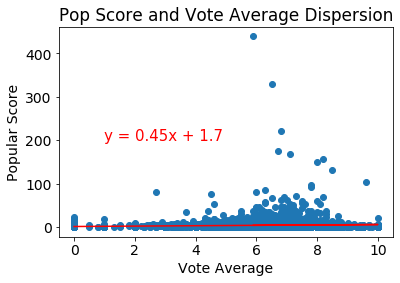

In [101]:
xlab = 'Vote Average'
ylab = 'Popular Score'
plt.title('Pop Score and Vote Average Dispersion')
eqpos = (1, 200)
linregFunc(Movies['Vote Average'], Movies['Popular Score'], xlab, ylab, eqpos)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('Resources/scatter.png')
print(f'The r-squared value is: {CorrCoef}')

In [102]:
CorrCoef=round(st.pearsonr(Movies["Popular Score"],Movies["Vote Average"])[0],2)
slope, Yint, r, p, std_err = st.linregress(Movies["Popular Score"],Movies["Vote Average"])
fit = slope * Movies["Popular Score"] + Yint

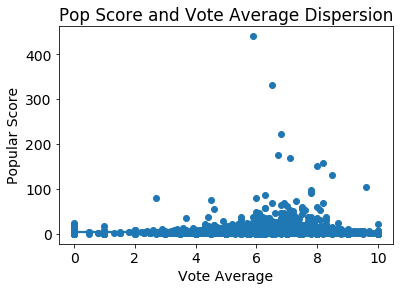

0.17


In [103]:
plt.scatter(Movies["Vote Average"],Movies["Popular Score"])
plt.plot(Movies["Vote Average"],fit,"--")
#plt.xticks(year, rotation=90)
plt.title("Pop Score and Vote Average Dispersion")
plt.xlabel('Vote Average')
plt.ylabel('Popular Score')
plt.show()
print(CorrCoef)

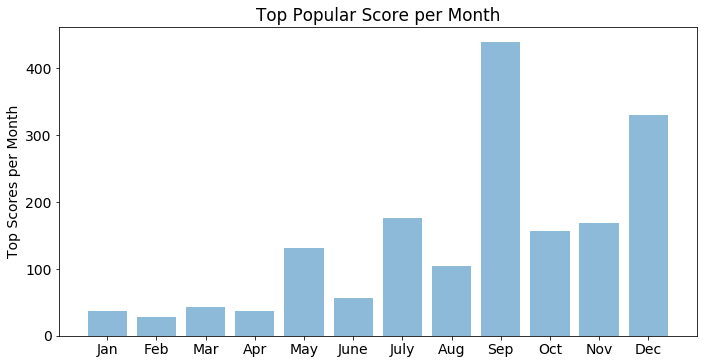

In [104]:
New=pd.merge(GenreFrame,Basis,how="inner",on="Genres")

New.sort_values(by='MonthID', inplace=True)
New

plt.figure(figsize=(10,5))
plt.bar(New["Month"],New["Top Score"], align='center', alpha=0.5)
plt.legend
plt.gcf().subplots_adjust(bottom=-0.15)
plt.ylabel('Top Scores per Month')
plt.tight_layout()
plt.title('Top Popular Score per Month')

plt.savefig("Resources/Top Popular Score per Month.png")

In [105]:
#narrowed down DataFrame to information specifically sought
movies_df=Movies[['Movie Title','Popular Score','Genres','Release Date']]

#movies_df['Genres'] =movies_df['Genres'].astype(str)#.apply(lambda x: #', '.join(Movies["Genres"].astype(str)))
movies_df.head()

,Movie Title,Popular Score,Genres,Release Date
0,Ad Astra,439.949,"[12, 18, 9648, 878, 53]",2019-09-17
1,Star Wars: The Rise of Skywalker,330.468,"[28, 12, 878]",2019-12-18
2,Jumanji: The Next Level,221.327,"[28, 12, 35, 14]",2019-12-04
3,A Rainy Day in New York,175.534,"[35, 10749]",2019-07-26
4,Frozen II,168.037,"[12, 16, 10751]",2019-11-20


In [106]:
#convert movie dataframe 'Release Date' into a datetime format from an objects
#isolating the month in the "Release Date"
import datetime
movies_df['Release Date']=pd.to_datetime(movies_df['Release Date']).dt.month
movies_df

C:\Users\Cade\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Movie Title,Popular Score,Genres,Release Date
0,Ad Astra,439.949,"[12, 18, 9648, 878, 53]",9
1,Star Wars: The Rise of Skywalker,330.468,"[28, 12, 878]",12
2,Jumanji: The Next Level,221.327,"[28, 12, 35, 14]",12
3,A Rainy Day in New York,175.534,"[35, 10749]",7
4,Frozen II,168.037,"[12, 16, 10751]",11
...,...,...,...,...
8438,Right Livelihood: A Journey to Here,0.840,[99],6
8439,Love Is War,0.840,[18],9
8440,Stuff,0.840,"[80, 18]",10
8441,Keyboard Fantasies: The Beverly Glenn-Copeland...,0.840,[99],11


In [107]:
#sorted movie values ascending by months and descending by popular score
sorted_values=movies_df.sort_values(['Release Date','Popular Score'], ascending=[1,0])
sorted_values

,Movie Title,Popular Score,Genres,Release Date
48,How to Train Your Dragon: The Hidden World,37.838,"[12, 16, 10751]",1
65,Alita: Battle Angel,34.095,"[28, 12, 878]",1
77,Glass,29.539,"[18, 878, 53]",1
152,The Lego Movie 2: The Second Part,18.837,"[28, 12, 16, 35, 14, 878, 10751]",1
153,劇場版 Fate／stay night [Heaven's Feel] II. lost b...,18.823,"[28, 16, 18, 14]",1
...,...,...,...,...
8189,无名狂,0.840,"[18, 9648, 28]",12
8193,Journeys to the Edge of Consciousness,0.840,"[99, 16, 12]",12
8200,Giftwrapped and Gutted,0.840,[27],12
8201,Weihnachten im Schnee,0.840,"[35, 10749, 10751]",12


In [108]:
expanded_data=sorted_values.explode('Genres')

expanded_data.dtypes

Movie Title       object
Popular Score    float64
Genres            object
Release Date       int64
dtype: object

In [109]:
#movies_df.groupby(['Release Date',(['Genres'])]).count()
counts=1
expanded_data['counts']=counts

In [110]:
rmv_data=expanded_data.drop(["Movie Title","Release Date","Popular Score"], axis=1)
count_data=rmv_data.groupby(['Genres']).count()


count_data

,counts
Genres,
12,271
14,276
16,419
18,3118
27,916
28,656
35,1820
36,231
37,35


In [111]:
#pandas.merge(left, right, how: str = 'inner', on=None, left_on=None, right_on=None, left_index: bool = False, right_index: bool = False, sort: bool = False, suffixes=('_x', '_y'), copy: bool = True, indicator: bool = False, validate=None) → 'DataFrame'[source]¶
#df1.merge(df2, left_on='lkey', right_on='rkey')
counts_merge_df=GenreFrame.merge(count_data, on='Genres')
counts_merge_df

,Genres,Genre Names,counts
0,28,Action,656
1,12,Adventure,271
2,16,Animation,419
3,35,Comedy,1820
4,80,Crime,478
5,99,Documentary,1866
6,18,Drama,3118
7,10751,Family,371
8,14,Fantasy,276
9,36,History,231


In [112]:
Action = counts_merge_df.iloc[0,2]    
Adventure=counts_merge_df.iloc[1,2]
Animation=counts_merge_df.iloc[2,2]
Comedy=counts_merge_df.iloc[3,2]
Crime=counts_merge_df.iloc[4,2]
Documentary=counts_merge_df.iloc[5,2]
Drama=counts_merge_df.iloc[6,2]
Family=counts_merge_df.iloc[7,2]
Fantasy=counts_merge_df.iloc[8,2]
History=counts_merge_df.iloc[9,2]
Horror=counts_merge_df.iloc[10,2]
Music=counts_merge_df.iloc[11,2]
Mystery=counts_merge_df.iloc[12,2]
Romance=counts_merge_df.iloc[13,2]
Science_Fiction=counts_merge_df.iloc[14,2]
TV_Movie=counts_merge_df.iloc[15,2]
Thriller=counts_merge_df.iloc[16,2]
War=counts_merge_df.iloc[17,2]
Western=counts_merge_df.iloc[18,2]

In [113]:
genre_sum = counts_merge_df['counts'].sum()

In [114]:
ActionPer=Action/genre_sum*100
AdventurePer=Adventure/genre_sum*100
AnimationPer=Animation/genre_sum*100
ComedyPer=Comedy/genre_sum*100
CrimePer=Crime/genre_sum*100
DocumentaryPer=Documentary/genre_sum*100
DramaPer=Drama/genre_sum*100
FamilyPer=Family/genre_sum*100
FantasyPer=Fantasy/genre_sum*100
HistoryPer=History/genre_sum*100
HorrorPer=Horror/genre_sum*100
MusicPer=Music/genre_sum*100
MysteryPer=Mystery/genre_sum*100
RomancePer=Romance/genre_sum*100
Science_FictionPer=Science_Fiction/genre_sum*100
TV_MoviePer=TV_Movie/genre_sum*100
ThrillerPer=Thriller/genre_sum*100
WarPer=War/genre_sum*100
WesternPer=Western/genre_sum*100

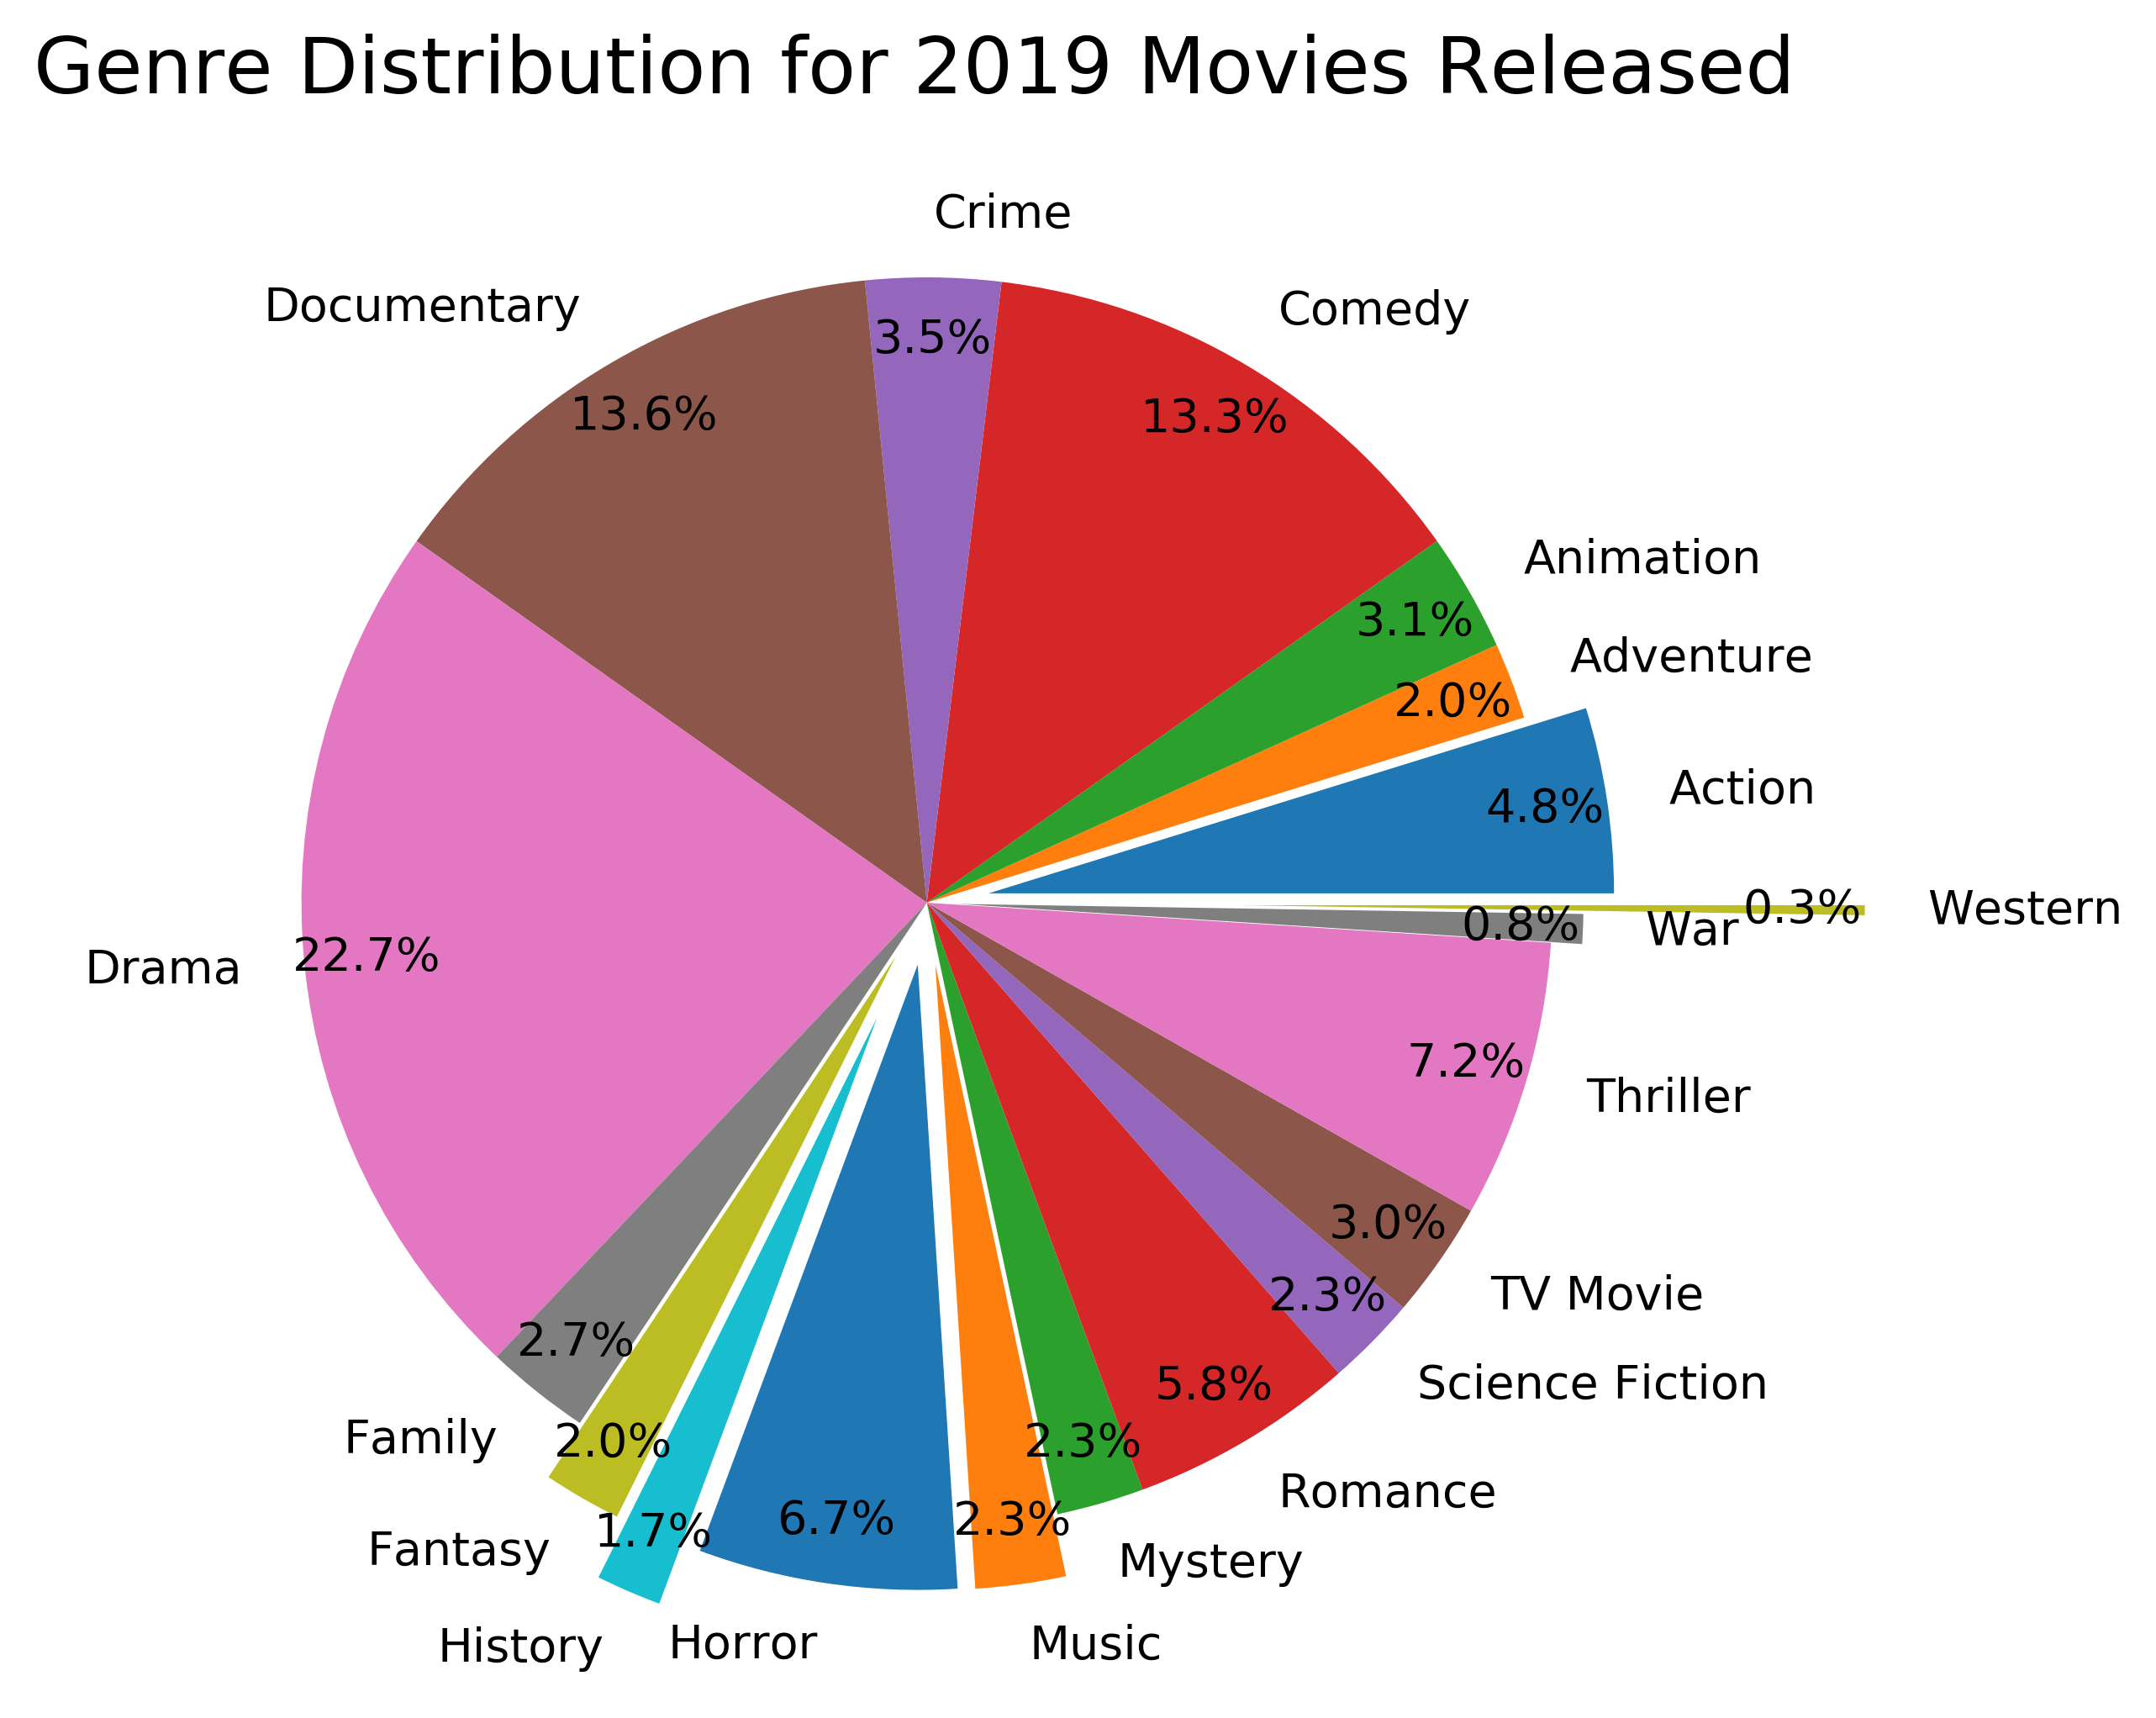

In [115]:
plt.figure(figsize=(6,10),dpi=400)
plt.title("Genre Distribution for 2019 Movies Released ")
plt.style.use('default')

#create pie chart showing percentages of total genres of movies released for 2019
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = ['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','History','Horror',
'Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western']
explode=(0.1,0,0,0,0,0,0,0,0.1,0.2,0.1,0.1,0,0,0,0,0,0.05,0.5)
plt.pie([ActionPer,AdventurePer,AnimationPer,ComedyPer,CrimePer,DocumentaryPer,DramaPer,FamilyPer,FantasyPer,HistoryPer,
        HorrorPer,MusicPer,MysteryPer,RomancePer,Science_FictionPer,TV_MoviePer,ThrillerPer,WarPer,WesternPer],labels=labels,
        autopct='%.1f%%',pctdistance=.9, explode = explode)

plt.savefig('Resources/pie_chart.png',dpi=400,bbox_inches = 'tight')

#savefig('foo.png', bbox_inches='tight')